In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
train_dataGenerator = test_dataGenerator= ImageDataGenerator(rescale=1./255)

train_generator = train_dataGenerator.flow_from_directory(
    '/gdrive/My Drive/Lattuce/train', 
    target_size=(24,24),
    batch_size=3,
    class_mode='binary')

test_generator = test_dataGenerator.flow_from_directory(
    '/gdrive/My Drive/Lattuce/test', 
    target_size=(24,24),
    batch_size=3,
    class_mode='binary')



Found 114 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

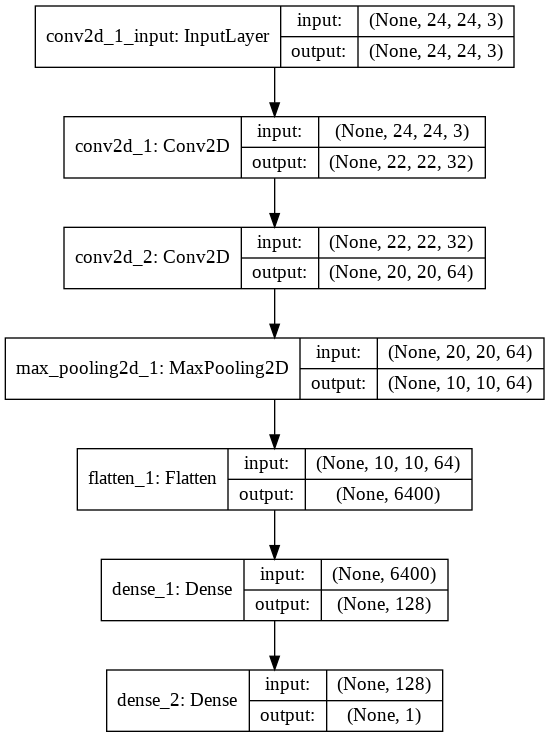

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model


SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
hist = model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5)




Epoch 1/50





15/15 [==============================] - 14s 921ms/step - loss: 0.7696 - acc: 0.4889 - val_loss: 0.6714 - val_acc: 0.5333
Epoch 2/50
15/15 [==============================] - 15s 988ms/step - loss: 0.6921 - acc: 0.4000 - val_loss: 0.6713 - val_acc: 0.5333
Epoch 3/50
15/15 [==============================] - 8s 536ms/step - loss: 0.6092 - acc: 0.5333 - val_loss: 0.5946 - val_acc: 0.6667
Epoch 4/50
15/15 [==============================] - 1s 88ms/step - loss: 0.4969 - acc: 0.8444 - val_loss: 0.4028 - val_acc: 0.8571
Epoch 5/50
15/15 [==============================] - 1s 64ms/step - loss: 0.4098 - acc: 0.8000 - val_loss: 0.7744 - val_acc: 0.5333
Epoch 6/50
15/15 [==============================] - 1s 89ms/step - loss: 0.3521 - acc: 0.8000 - val_loss: 0.4262 - val_acc: 0.8000
Epoch 7/50
15/15 [==============================] - 1s 95ms/step - loss: 0.4176 - acc: 0.8000 - val_loss: 0.4687 - val_acc: 0.7143
Epoch 8/50
15/15 [==============================] - 1s 55ms/step - los

In [ ]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 73.33%


In [ ]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'cercospora': 0, 'normal': 1}
[[0.983]
 [0.221]
 [0.000]
 [1.000]
 [1.000]
 [0.001]
 [1.000]
 [0.012]
 [0.815]
 [0.000]
 [0.001]
 [0.000]
 [0.002]
 [0.137]
 [0.383]]


In [ ]:
from keras.preprocessing import image
test_image = image.load_img('/gdrive/My Drive/Lattuce/predict2.jpg', target_size = (24,24))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if result[0][0] >= 0.5:
  prediction = 'normal' 
else:
  prediction = 'cercospora'
print(prediction)

cercospora


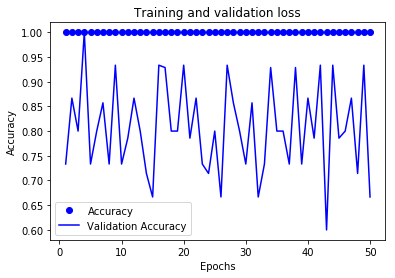

In [ ]:
import matplotlib.pyplot as plt

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Accuracy')

plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
from keras.models import load_model

Using TensorFlow backend.


In [ ]:
model.save('DL_CNN_farm.h5')

In [ ]:
from google.colab import files
files.download('DL_CNN_farm.h5')